[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]
(743, 2)
Número de entradas incorrectas: 8
Parámetros del modelo fp1: [  2.59619213 989.02487106]
Error del modelo fp1: [3.17389767e+08]
Parámetros del modelo fp2: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
Error del modelo fp2: [1.79983508e+08]


c:\users\jyd\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Errores para el conjunto completo de datos:
Error d=1: 317389767.339778
Error d=2: 179983507.878179
Error d=3: 139350144.031725
Error d=10: 121942326.363437
Error d=53: 109452397.618918
Errores solamente después del punto de inflexión
Error d=1: 145045835.134473
Error d=2: 61116348.809620
Error d=3: 33214248.905597
Error d=10: 21611594.263638
Error d=53: 18656091.480307
Error de inflexión=132950348.197616
Entrenamiento de datos únicamente despúes del punto de inflexión
Errores después del punto de inflexión
Error d=1: 22143941.107618
Error d=2: 19768846.989176
Error d=3: 19766452.361027
Error d=10: 18949296.707808
Error d=53: 18300666.568704


c:\users\jyd\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\jyd\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


fbt2(x)= 
         2
0.07424 x - 78.66 x + 2.242e+04
fbt2(x)-100,000= 
         2
0.07424 x - 78.66 x - 7.758e+04
Prueba de error para después del punto de inflexión
Error d=1: 6883556.675646
Error d=2: 5881123.696087
Error d=3: 5879184.013961
Error d=10: 6121561.716407
Error d=53: 6796850.872513


c:\users\jyd\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\users\jyd\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


         2
0.07424 x - 78.66 x + 2.242e+04
         2
0.07424 x - 78.66 x - 7.758e+04

100,000 solicitudes/hora esperados en la semana 10.006883


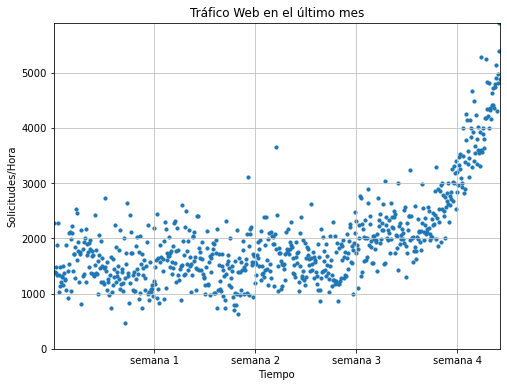

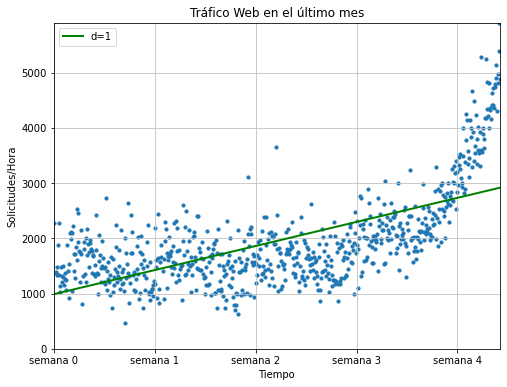

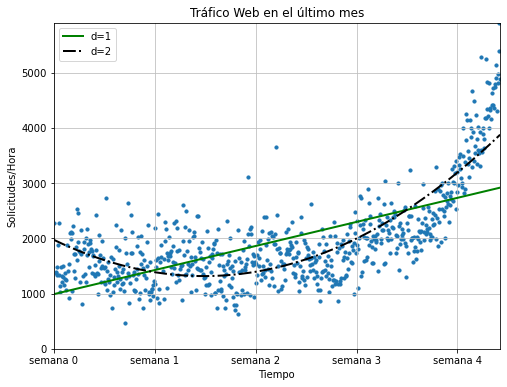

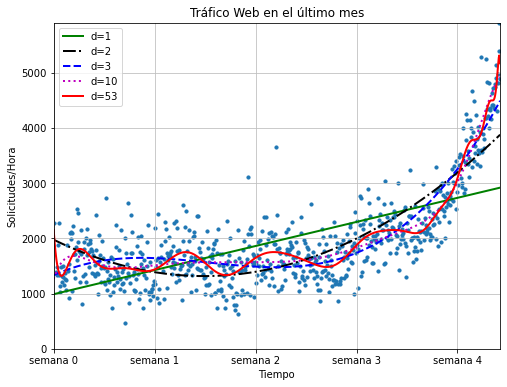

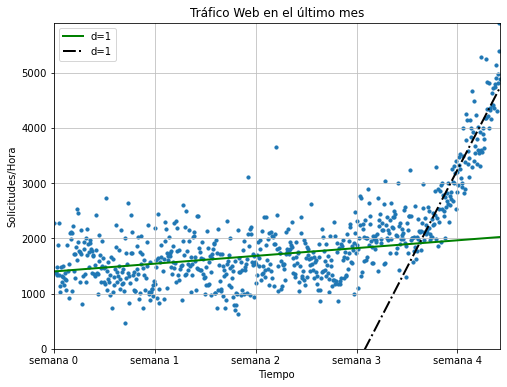

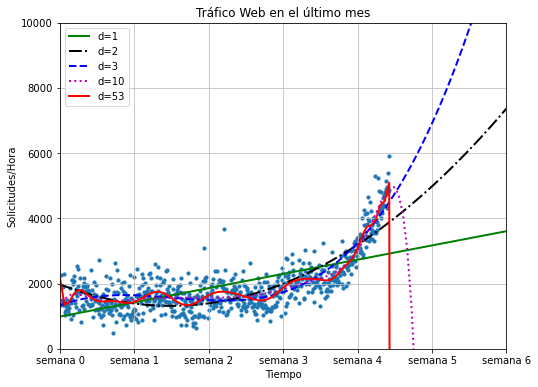

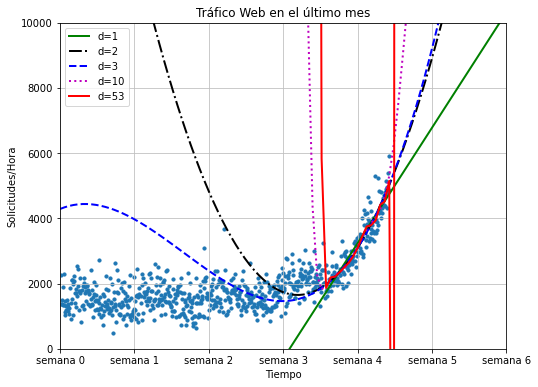

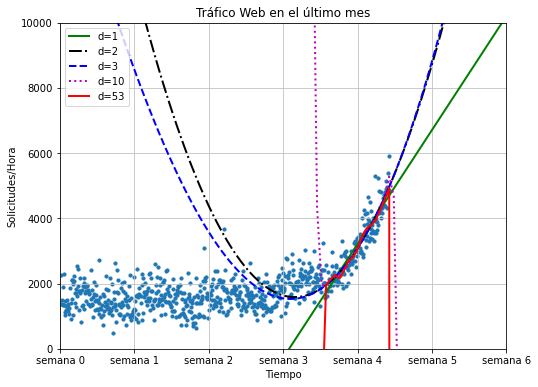

In [1]:
# COMPUTACIÓN BLANDA - Sistemas y Computación

# -----------------------------------------------------------------
# AJUSTES POLINOMIALES
# -----------------------------------------------------------------
# Lección 06
#
#   ** Se importan los archivos de trabajo
#   ** Se crean las variables
#   ** Se generan los modelos
#   ** Se grafican las funciones
#
# -----------------------------------------------------------------

# Se importa la librería del Sistema Operativo
# Igualmente, la librería utils y numpy
# -----------------------------------------------------------------
import os

# Directorios: chart y data en el directorio de trabajo
# DATA_DIR es el directorio de los datos
# CHART_DIR es el directorio de los gráficos generados
# -----------------------------------------------------------------
from utils import DATA_DIR, CHART_DIR
import numpy as np

# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')

# Se importa la librería scipy y matplotlib
# -----------------------------------------------------------------
import scipy as sp
import matplotlib.pyplot as plt

# Datos de trabajo
# -----------------------------------------------------------------
data = np.genfromtxt(os.path.join(DATA_DIR, "web_traffic.tsv"), 
                     delimiter="\t")
#la variable data, recibe el archivo web_traffic con el delimitador \t mediante la función np.genfromtxt

# Se establece el tipo de dato
data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)

# Se definen los colores
# g = green, k = black, b = blue, m = magenta, r = red
# g = verde, k = negro, b = azul, m = magenta, r = rojo
colors = ['g', 'k', 'b', 'm', 'r']

# Se definen los tipos de líneas
# los cuales serán utilizados en las gráficas
linestyles = ['-', '-.', '--', ':', '-']

# Se crea el vector x, correspondiente a la primera columna de data
# Se crea el vercot y, correspondiente a la segunda columna de data
x = data[:, 0]
y = data[:, 1]

# la función isnan(vector) devuelve un vector en el cual los TRUE
# son valores de tipo nan, y los valores FALSE son valores diferentes
# a nan. Con esta información, este vector permite realizar 
# transformaciones a otros vectores (o al mismo vector), y realizar
# operaciones como sumar el número de posiciones TRUE, con lo
# cual se calcula el total de valores tipo nan
print("Número de entradas incorrectas:", np.sum(np.isnan(y)))

# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# Los valores nan en el vector y deben eliminarse
# Para ello se crea un vector TRUE y FALSE basado en isnan
# Al negar dichos valores (~), los valores que son FALSE se vuelven
# TRUE, y se corresponden con aquellos valores que NO son nan
# Si el vector x, que contiene los valores en el eje x, se afectan
# a partir de dicho valores lógicos, se genera un nuevo vector en
# el que solos se toman aquellos que son TRUE. Por tanto, se crea
# un nuevo vector x, en el cual han desaparecido los correspondientes
# valores de y que son nan

# Esto mismo se aplica, pero sobre el vector y, lo cual hace que tanto
# x como y queden completamente sincronizados: sin valores nan
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]

# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE 
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
    ''' dibujar datos de entrada '''

    # Crea una nueva figura, o activa una existente.
    # num = identificador, figsize: anchura, altura
    plt.figure(num=None, figsize=(8, 6))
    
    # Borra el espacio de la figura
    plt.clf()
    
    # Un gráfico de dispersión de y frente a x con diferentes tamaños 
    # y colores de marcador (tamaño = 10)
    plt.scatter(x, y, s=10)
    
    # Títulos de la figura
    # Título superior
    plt.title("Tráfico Web en el último mes")
    
    # Título en la base
    plt.xlabel("Tiempo")
    
    # Título lateral
    plt.ylabel("Solicitudes/Hora")
    
    # Obtiene o establece las ubicaciones de las marcas 
    # actuales y las etiquetas del eje x.
    
    # Los primeros corchetes ([]) se refieren a las marcas en x
    # Los siguientes corchetes ([]) se refieren a las etiquetas
    
    # En el primer corchete se tiene: 1*7*24 + 2*7*24 + ..., hasta
    # completar el total de puntos en el eje horizontal, según
    # el tamaño del vector x
    
    # Además, se aprovecha para calcular los valores de w, los
    # cuales se agrupan en paquetes de w*7*24. Esto permite
    # determinar los valores de w desde 1 hasta 5, indicando
    # con ello que se tiene un poco más de 4 semanas
    
    # Estos valores se utilizan en el segundo corchete para
    # escribir las etiquetas basadas en estos valores de w
    
    # Por tanto, se escriben etiquetas para w desde 1 hasta
    # 4, lo cual constituye las semanas analizadas
    plt.xticks(
        [w * 7 * 24 for w in range(10)], 
        ['semana %i' % w for w in range(10)])

    # Aquí se evalúa el tipo de modelo recibido
    # Si no se envía ninguno, no se dibuja ninguna curva de ajuste
    if models:
        
        # Si no se define ningún valor para mx (revisar el 
        # código más adelante), el valor de mx será
        # calculado con la función linspace

        # NOTA: linspace devuelve números espaciados uniformemente 
        # durante un intervalo especificado. En este caso, sobre
        # el conjunto de valores x establecido
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        
        # La función zip () toma elementos iterables 
        # (puede ser cero o más), los agrega en una tupla y los devuelve
        
        # Aquí se realiza un ciclo .....
        
        for model, style, color in zip(models, linestyles, colors):
            # print "Modelo:",model
            # print "Coeffs:",model.coeffs
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)

        plt.legend(["d=%i" % m.order for m in models], loc="upper left")

    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)

# Primera mirada a los datos
# -----------------------------------------------------------------
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)

fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)

f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f100 = sp.poly1d(np.polyfit(x, y, 100))

# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
plot_models(
    x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR, 
                                                "1400_01_04.png"))

# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = 3.5 * 7 * 24
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]
xb = x[int(inflexion):]
yb = y[int(inflexion):]

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))

# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))

# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)

# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))

print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10, f100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))

# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10, f100],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
fb100 = sp.poly1d(np.polyfit(xb, yb, 100))

print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10, fb100]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))

# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
    x, y, [fb1, fb2, fb3, fb10, fb100],
    os.path.join(CHART_DIR, "1400_01_07.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))

print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10, fbt100],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 7 * 24, 6 * 7 * 24, 100),
    ymax=10000, xmin=0 * 7 * 24)

from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 100000)
alcanzado_max = fsolve(fbt2 - 100000, x0=800) / (7 * 24)
print("\n100,000 solicitudes/hora esperados en la semana %f" % 
      alcanzado_max[0])